Objectives
1. Data Preprocessing
2. Data Cleaning
3. Data Normalization
 

In [1]:
import pandas as pd
import numpy as np


In [127]:
# Create random dataframe
df=pd.DataFrame({'a':np.random.randint(10,10000,10),'b':np.random.randint(10,10000,10)})
df

,a,b
0,9247,1675
1,3685,1771
2,2711,113
3,6000,7921
4,309,8035
5,656,7895
6,7528,802
7,7746,2845
8,5015,4007
9,1782,333


In [126]:
# Simple manhattan distance between two observations
a=df.iloc[5:6,:].values
b=df.iloc[8:9,:].values

abs(a-b).sum()


7610.5

In [128]:
# library for getting distance matrix for entire data
from sklearn.metrics import pairwise_distances
X_precomputed = pairwise_distances(df, metric='euclidean')

In [81]:
df.head()

,a,b
0,1670,1467
1,3991,5965
2,1775,7350
3,6899,5708
4,965,4298


In [82]:
df2=pd.DataFrame(X_precomputed)
df2


,0,1,2,3,4,5,6,7,8,9
0,0.000000,5061.525956,5883.936947,6732.645988,2917.462253,5104.739464,11547.518695,2019.041852,6746.760556,10172.594605
1,5061.525956,0.000000,2613.212774,2919.334342,3454.788706,5581.067998,6840.190714,4907.391262,2788.064741,6002.041153
2,5883.936947,2613.212774,0.000000,5380.663528,3157.657993,7980.011591,8243.324208,4767.994966,987.086622,7984.341238
3,6732.645988,2919.334342,5380.663528,0.000000,6099.217655,4589.015690,4944.877147,7284.103514,5220.516450,3448.388174
4,2917.462253,3454.788706,3157.657993,6099.217655,0.000000,6611.363929,10284.389044,1638.126979,4109.895376,9403.661893
5,5104.739464,5581.067998,7980.011591,4589.015690,6611.363929,0.000000,9166.528296,6787.896360,8353.296894,7174.226230
6,11547.518695,6840.190714,8243.324208,4944.877147,10284.389044,9166.528296,0.000000,11736.496326,7516.322638,2186.079825
7,2019.041852,4907.391262,4767.994966,7284.103514,1638.126979,6787.896360,11736.496326,0.000000,5733.966515,10689.307227
8,6746.760556,2788.064741,987.086622,5220.516450,4109.895376,8353.296894,7516.322638,5733.966515,0.000000,7470.687050
9,10172.594605,6002.041153,7984.341238,3448.388174,9403.661893,7174.226230,2186.079825,10689.307227,7470.687050,0.000000


In [84]:
X_precomputed2 = pairwise_distances(df, metric='manhattan')
df3=pd.DataFrame(X_precomputed2)
df3

,0,1,2,3,4,5,6,7,8,9
0,0.0,6819.0,5988.0,9470.0,3536.0,5439.0,16326.0,2854.0,7350.0,14259.0
1,6819.0,0.0,3601.0,3165.0,4693.0,7616.0,9507.0,6907.0,3907.0,7440.0
2,5988.0,3601.0,0.0,6766.0,3862.0,11217.0,10338.0,6076.0,1362.0,8271.0
3,9470.0,3165.0,6766.0,0.0,7344.0,4723.0,6856.0,9558.0,7072.0,4789.0
4,3536.0,4693.0,3862.0,7344.0,0.0,8975.0,14200.0,2214.0,5224.0,12133.0
5,5439.0,7616.0,11217.0,4723.0,8975.0,0.0,11579.0,8293.0,11523.0,9512.0
6,16326.0,9507.0,10338.0,6856.0,14200.0,11579.0,0.0,16414.0,8976.0,2299.0
7,2854.0,6907.0,6076.0,9558.0,2214.0,8293.0,16414.0,0.0,7438.0,14347.0
8,7350.0,3907.0,1362.0,7072.0,5224.0,11523.0,8976.0,7438.0,0.0,7993.0
9,14259.0,7440.0,8271.0,4789.0,12133.0,9512.0,2299.0,14347.0,7993.0,0.0


#### above matrix shows distance from every single sample(observation ) against all observations
#### for instance for the point number 7 the closest observation is row number 4, because they have smallest distance from each other

In [86]:
#check for missing values
df.isnull().any() 

a    False
b    False
dtype: bool

In [129]:
#assigining nan values manually

In [137]:
df.iloc[::3,1]=np.nan # assign nan values for the column index 1 every after 3 rows
df

,a,b
0,9247,NaN
1,3685,1771.0
2,2711,113.0
3,6000,NaN
4,309,8035.0
5,656,NaN
6,7528,NaN
7,7746,2845.0
8,5015,4007.0
9,1782,NaN


In [138]:
df.isnull().any() #check again

a    False
b     True
dtype: bool

In [139]:
df.isnull().sum() #look for the total nan values on every single column

a    0
b    5
dtype: int64

### Handling Missing values

1. By filling with mean 
2. filling with median
3. Dropping
4. Forward and Backward filling


In [98]:
df.fillna(df['b'].mean(),inplace=True)  #Filling with mean
df

,a,b
0,2783,3431.5
1,3151,1388.0
2,2287,64.0
3,7843,5151.0
4,4141,6731.0
5,1427,3431.5
6,5256,2202.0
7,1256,5781.0
8,7916,4553.0
9,1955,1582.0


In [ ]:
df.fillna(df['b'].median(),inplace=True)  #Filling with median
df.fillna(method='ffill') #Forward filling
df.fillna(method='ffill') #Backward filling

### REading CSV files in Pandas

In [111]:
data=pd.read_csv(r'C:\Users\kduisheev\Documents\pythohn bc IL\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [100]:
data.tail(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [112]:
data['State'].value_counts() #getting frequqncy distribution of unique values

California    17
New York      17
Florida       16
Name: State, dtype: int64

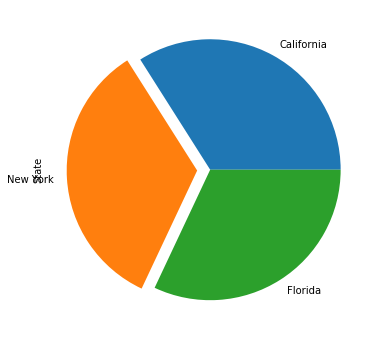

In [106]:
import matplotlib.pyplot as plt #plotting categorical features
data['State'].value_counts().plot(kind='pie',figsize=(8,6),explode=[0,0.1,0,])



In [113]:
data[data['State']=='Florida']['Profit'].sum() #get the total profit done by state Florida

1900384.39

In [108]:
group=data.groupby('State')['Profit'].agg(['size','mean','min','max','sum']) #apply grouping
group

,size,mean,min,max,sum
State,,,,,
California,17,103905.175294,14681.40,191792.06,1766387.98
Florida,16,118774.024375,49490.75,191050.39,1900384.39
New York,17,113756.446471,35673.41,192261.83,1933859.59


In [109]:
group.reset_index(inplace=True) 
group

,State,size,mean,min,max,sum
0,California,17,103905.175294,14681.40,191792.06,1766387.98
1,Florida,16,118774.024375,49490.75,191050.39,1900384.39
2,New York,17,113756.446471,35673.41,192261.83,1933859.59


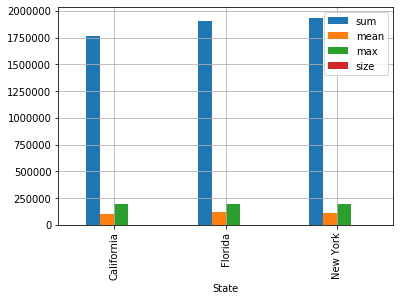

In [110]:

group.plot('State', ['sum','mean','max','size'], kind="bar")
plt.grid()
plt.show()

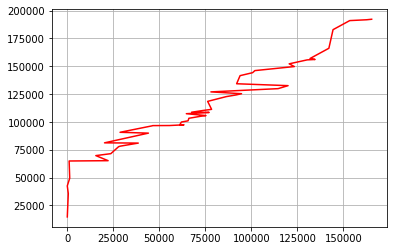

In [149]:
#Profit and research Spending analysis
plt.plot(data['R&D Spend'],data['Profit'],color='red')
plt.grid()
plt.show()

In [147]:
data['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

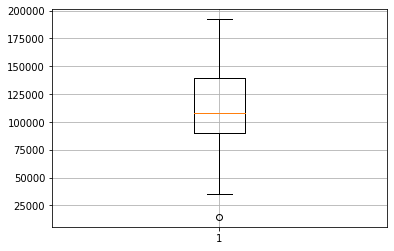

In [148]:
plt.boxplot(data['Profit'])
plt.grid()
plt.show()

#### Box plot has : orange line >> Median, Upper boundary Maximum, Lower line> min
#### rectangular region contains 50% of entire data, upper whisker contains 25% of data,
#### as well as lower whisker, bubbles on the graph are outliers

### plotting of boxes by states

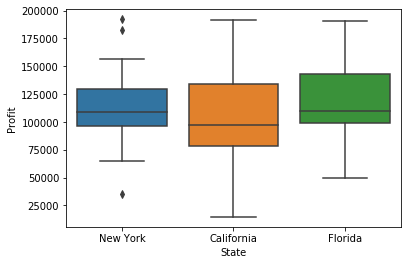

In [117]:
import seaborn as sns
sns.boxplot(x='State',y='Profit',data=data)

#### New York has three outliers

### correlation analysis

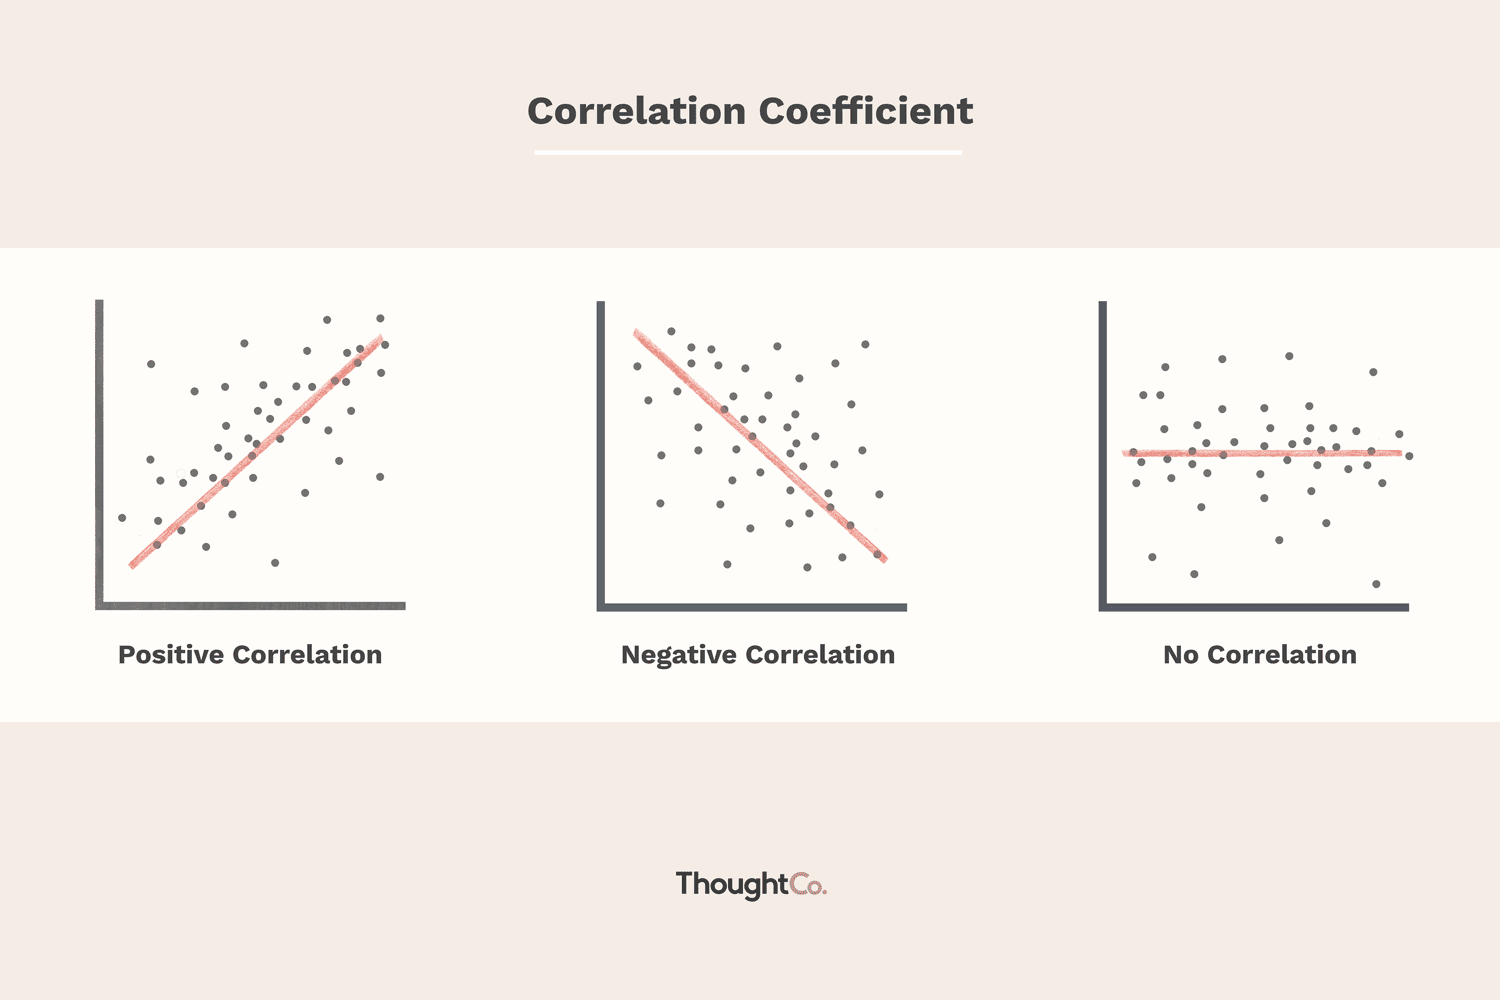

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people. 

The main result of a correlation is called the correlation coefficient (or "r"). It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

In [155]:
data.corr() #function for getting correlation matrix

,R&D Spend,Administration,Profit
R&D Spend,1.000000,0.241955,0.972900
Administration,0.241955,1.000000,0.200717
Profit,0.972900,0.200717,1.000000


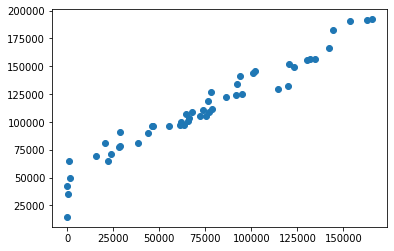

In [154]:
plt.scatter(data['R&D Spend'],data['Profit'])
plt.show()

##### Table and graph Shows High positive correlation btwn profit and Research spending

## Assignment Problems: Data set 50_StartUps.csv file

#### Normalize numeric columns using at least two normalization techniques mentioned in the chapter(Use your python skills)
#### Apply at least 5 missing values on any one of the columns then fill with any of the filling techniques mentioned above(except mean() filling)
#### show scatter plot of numeric columns against each other, apply labelings
#### get manhattan and euclidean distance matrix for numeric columns, 
#### choose any observation and explain who is the closest observation for him
#### describe briefly about the type of  States column. what kind of data is that column
#### explain which column has the highest correaltion against profit after R& D Spendings
 